In [0]:
import numpy as np # for Linear Algebra
import pandas as pd # for procesing data - import csv file and manipulate data
import matplotlib.pyplot as plt # for visual representation of data
import sklearn as sk # 
import seaborn as sns # for interactive graphs
import datetime # for date and time
import random
from sklearn.preprocessing import scale
%matplotlib inline


In [7]:
df = pd.read_csv('creditcard.csv' , low_memory=False)
df = df.sample(frac=1).reset_index(drop=True) 
# Shuffling the rows in place. Here, specifying drop=True prevents .reset_index from creating a column containing the old index entries.
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,70475.0,1.235671,-0.010748,0.907062,1.072086,-0.580481,0.164288,-0.591185,0.140895,0.872865,-0.133540,-1.471356,-0.074363,-0.118437,-0.223571,0.723005,0.532035,-0.689783,0.388264,-0.043607,-0.138209,-0.069591,-0.047516,-0.098119,-0.471234,0.492457,-0.345823,0.067178,0.028419,1.00,0
1,77845.0,1.100857,0.234466,0.632567,1.523754,-0.355652,-0.469206,0.151873,-0.098894,0.134986,-0.154686,0.073355,1.121212,0.556978,-0.053958,-0.217486,-0.913714,0.413559,-1.245421,-0.578368,-0.129902,-0.049325,0.099258,-0.018355,0.636558,0.613066,-0.349295,0.043143,0.025400,22.26,0
2,133620.0,1.937535,0.582299,-2.917501,0.817224,0.889577,-1.870208,0.782782,-0.505901,0.408766,-1.523602,0.340996,0.071550,0.297241,-2.861470,0.724552,0.404660,2.268403,1.040198,-0.521830,-0.020837,-0.034256,0.033318,-0.097274,-0.339552,0.367557,-0.517699,0.028099,0.024572,61.60,0
3,160510.0,-0.264772,1.160995,-0.722729,-0.584521,0.536621,-0.556156,0.482343,0.520093,-0.378470,-0.883332,0.895373,0.402382,-0.767431,-0.346447,-0.860196,0.591747,0.425254,0.281448,-0.058788,-0.118486,-0.237398,-0.747180,0.189148,0.579325,-0.479137,0.096986,0.088747,0.011643,12.28,0
4,145525.0,0.211637,2.112439,-1.023392,4.833775,0.816122,0.172796,0.152327,0.665793,-2.016308,0.703192,0.843026,-1.096767,-1.493292,-1.703262,0.109402,1.079077,2.276070,1.563914,1.107155,0.111802,-0.344407,-1.008312,0.197925,-0.736225,-0.749180,0.061827,0.173362,-0.000103,5.73,0


Kaggle has anonymised most data. Only the time of the transaction and the amounts are visible. Class is a categorical variable and is 1 for Fraudulent transaction and 0 for Non-fraudulent transaction. 

In [8]:
print(df.isnull().sum())
# There are no missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
df.describe()
# some basic statistical information of the data columns such as mean, standard deviation and range

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.207592e-15,3.701450e-16,-1.427476e-15,2.064137e-15,1.021897e-15,1.491768e-15,-5.702921e-16,1.163470e-16,-2.439518e-15,2.235950e-15,1.696114e-15,-1.264141e-15,8.437667e-16,1.185085e-15,4.888855e-15,1.421282e-15,-3.816810e-16,9.544926e-16,1.054907e-15,6.400247e-16,1.528792e-16,-3.433479e-16,2.704445e-16,4.487358e-15,5.268954e-16,1.683583e-15,-3.720191e-16,-1.270469e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
fraud = df.loc[df['Class']==1] 
non_fraud = df.loc[df['Class']==0] 
print('No Frauds' , len(non_fraud))
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds' , len(fraud))
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
# There are far fewer fraudulent transactions when compared to non-fraudulent transactions
# The classes are heavily skewed

No Frauds 284315
No Frauds 99.83 % of the dataset
Frauds 492
Frauds 0.17 % of the dataset


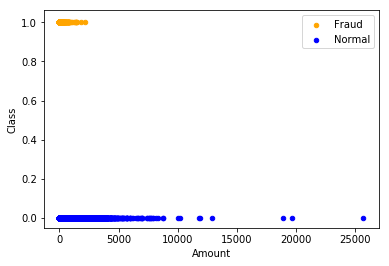

In [11]:
ax = fraud.plot.scatter(x='Amount' , y='Class' , c='Orange' , label='Fraud')
non_fraud.plot.scatter(x='Amount' , y='Class' , c='Blue' , label='Normal' , ax=ax)
plt.show()
# Data Exploration shows that fraudulent transactions were of lower amounts

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

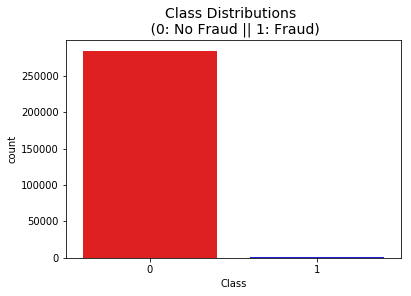

In [12]:
colors = ["Red", "Blue"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
# the fraudulent transactions are hardly visible in the histogram as they make up only 0.17% of total transactions

## Correlation matrix

To check if there is any strong correlation betweeen the parameters (lighter colour)

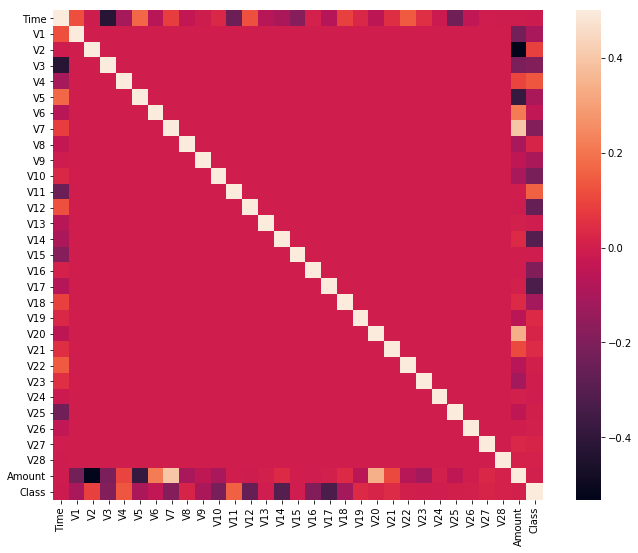

In [13]:
corr = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corr, vmax = 0.5, square = True)

# Machine Learning

## Logistic Regression

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [0]:
x = df.iloc[: , :-1]
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)
# split the sample into 65% train and 35% test


In [16]:
logistic = linear_model.LogisticRegression(C=1e5)
# 1e5 means 10 to the power of (exponent) 5 = 100000 (1 followed by 5 zeros)
logistic.fit(x_train, y_train)
print('score', logistic.score(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


score 0.9992476149393578


In [0]:
x = df.iloc[: , :-1]
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
# split the sample down the middle 50%


In [18]:
logistic = linear_model.LogisticRegression(C=1e5)
# 1e5 means 10 to the power of (exponent) 5 = 100000 (1 followed by 5 zeros)
logistic.fit(x_train, y_train)
print('score', logistic.score(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


score 0.9989677256256847


In [0]:
x = df.iloc[: , :-1]
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8)
# split the sample into 20% train and 80% test


In [20]:
logistic = linear_model.LogisticRegression(C=1e5)
# 1e5 means 10 to the power of (exponent) 5 = 100000 (1 followed by 5 zeros)
logistic.fit(x_train, y_train)
print('score', logistic.score(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


score 0.9990256576810653


Changing the Train Test ratios in the data sample did not change the logistic score significantly

In [21]:
y_predicted = np.array(logistic.predict(x_test))
print(y_predicted)

# Print the classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227456
           1       0.72      0.69      0.71       390

    accuracy                           1.00    227846
   macro avg       0.86      0.85      0.85    227846
weighted avg       1.00      1.00      1.00    227846



Support shows poor results in detecting fraud

## Confusion Matrix
### Top Left - True Non-Fraud;   Top Right - False Non-Fraud; 
### Bottom Left - False Fraud;   Bottom Right - True Fraud
https://en.wikipedia.org/wiki/Confusion_matrix

In [22]:
# Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_predicted.round()))

[[227353    103]
 [   119    271]]


## Random Forest

https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d

In [0]:
x = df.iloc[: , :-1]
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)

In [0]:
from sklearn.ensemble import RandomForestClassifier
# train model
rfc = RandomForestClassifier(n_estimators=100).fit(x_train, y_train)
# predict on test set
rfc_pred = rfc.predict(x_test)

In [25]:
print(confusion_matrix(y_test, rfc_pred.round()))

[[99507     9]
 [   31   136]]


## Random Under-sampling

Here we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

Steps:
The first thing we have to do is determine how imbalanced is our class (use "value_counts()" on the class column to determine the amount for each label)
Once we determine how many instances are considered fraud transactions (Fraud = "1") , we should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 492 cases of fraud and 492 cases of non-fraud transactions.
After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.
Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)

In [30]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
89749,55911.0,0.314670,-2.522317,0.479031,-0.180306,-1.717166,0.823646,-0.658658,0.241921,-0.130593,0.281217,0.786864,0.326398,-0.137825,-0.551806,-1.016302,0.815114,0.627632,-1.259018,0.811589,1.039351,0.359417,0.067713,-0.453266,-0.246720,0.133500,-0.264453,-0.029507,0.094770,508.56,0
11468,84789.0,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,-0.713474,1.274629,0.023682,-1.521696,0.727242,0.166505,0.348038,-0.566390,0.216016,-1.140376,0.634184,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33,1
155277,141650.0,1.964854,0.306862,-2.347355,1.144732,1.453977,-0.144400,0.871268,-0.209065,-0.308091,0.253584,-0.158279,0.444811,-0.257543,0.987935,0.462034,-1.817581,0.686020,-1.937979,-1.453749,-0.410936,0.392735,1.461507,-0.126488,-0.910153,0.646694,-0.101542,0.000524,-0.089904,1.00,0
155668,59011.0,-2.326922,-3.348439,-3.513408,3.175060,-2.815137,-0.203363,-0.892144,0.333226,-0.802005,-4.350685,3.064246,-2.718731,0.068788,-5.586873,-0.966076,-2.502049,-4.460495,-0.870526,0.595629,3.209171,1.226648,-0.695902,-1.478490,-0.061553,0.236155,0.531911,0.302324,0.536375,1389.56,1
213016,158638.0,-5.976119,-7.196980,-5.388316,5.104799,4.676533,-5.566870,-4.291180,0.876531,-1.075478,-3.272569,1.168216,-2.134732,1.128313,-4.566010,-0.126950,-2.826986,-2.865750,-0.912934,0.421144,3.136338,1.459369,-0.136262,0.848177,-0.269916,-1.095060,-0.710905,0.565846,-1.034107,296.00,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


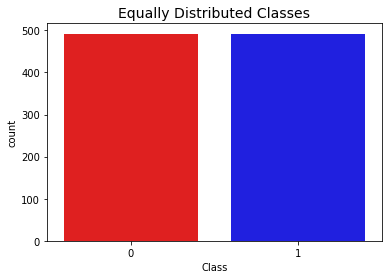

In [32]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))



sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [0]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

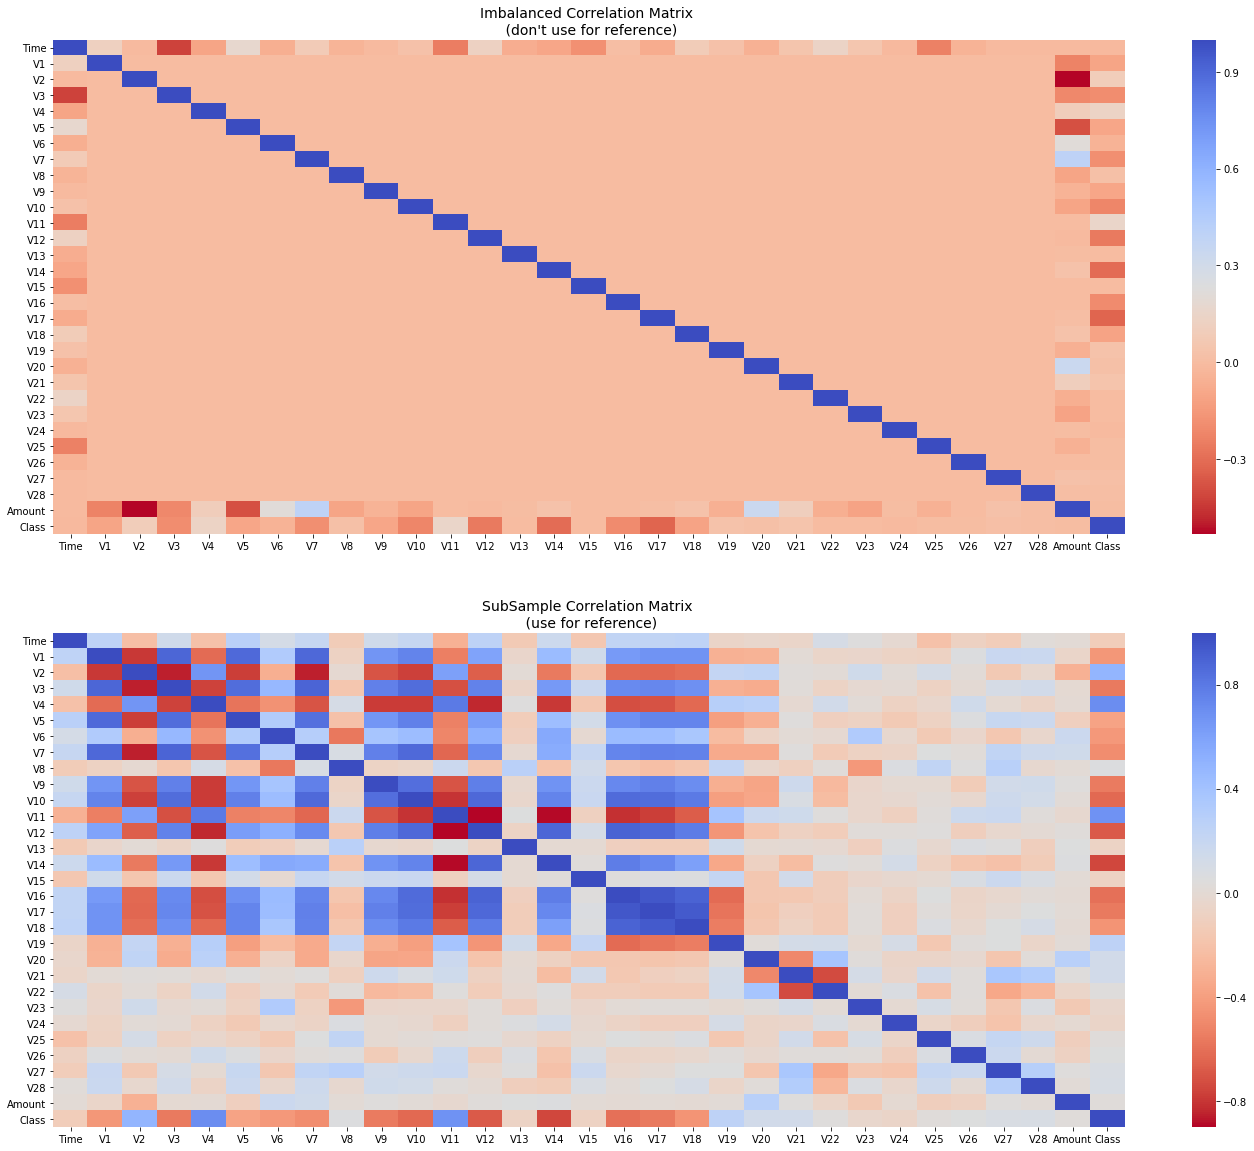

In [33]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [0]:
# There is better correlation after Random Under-Sampling (Blue)